<class 'pandas.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   cgpa            10 non-null     float64
 1   internships     10 non-null     int64  
 2   projects        10 non-null     int64  
 3   certifications  10 non-null     int64  
 4   aptitude_score  10 non-null     int64  
 5   soft_skills     10 non-null     int64  
 6   placed          10 non-null     int64  
dtypes: float64(1), int64(6)
memory usage: 692.0 bytes
Model Accuracy: 0.5

Classification Report:

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.50      1.00      0.67         1

    accuracy                           0.50         2
   macro avg       0.25      0.50      0.33         2
weighted avg       0.25      0.50      0.33         2

Improved Accuracy: 0.5
Random Forest Accuracy: 1.0


c:\Users\aksha\AppData\Local\Programs\Python\Python314\Lib\site-packages\sklearn\metrics\_classification.py:1833: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\aksha\AppData\Local\Programs\Python\Python314\Lib\site-packages\sklearn\metrics\_classification.py:1833: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\aksha\AppData\Local\Programs\Python\Python314\Lib\site-packages\sklearn\metrics\_classification.py:1833: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(ave

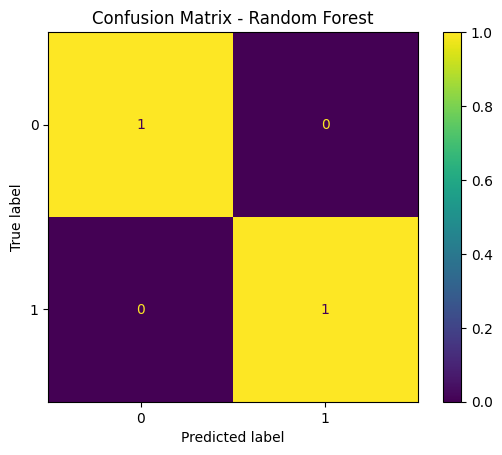

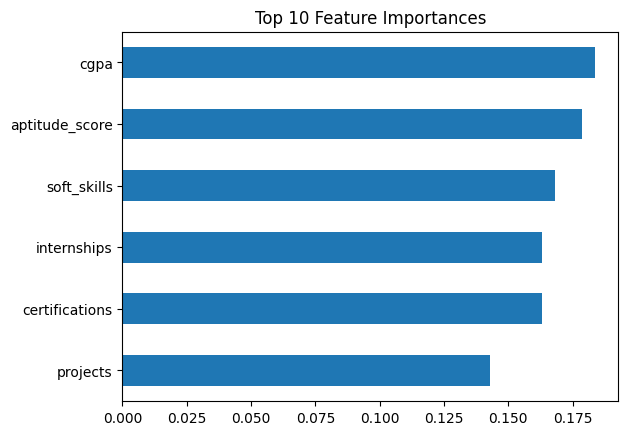

In [12]:
import pandas as pd

df = pd.read_csv("../data/student_placement.csv")
df.head()
df.shape
df.columns
df.info()
df.describe()
list(df.columns)
df["placed"].value_counts()
df.isnull().sum()
df.isnull().mean() * 100
num_cols = df.select_dtypes(include=["int64", "float64"]).columns
cat_cols = df.select_dtypes(include=["object"]).columns

num_cols, cat_cols
df[num_cols] = df[num_cols].fillna(df[num_cols].mean())
for col in cat_cols:
    df[col].fillna(df[col].mode()[0], inplace=True)
df.isnull().sum()
df_encoded = pd.get_dummies(df, drop_first=True)
df_encoded.head()
X = df_encoded.drop("placed", axis=1)
y = df_encoded["placed"]
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
from sklearn.metrics import accuracy_score, classification_report

accuracy = accuracy_score(y_test, y_pred)
print("Model Accuracy:", accuracy)

print("\nClassification Report:\n")
print(classification_report(y_test, y_pred))
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
model = LogisticRegression(max_iter=1000)
model.fit(X_train_scaled, y_train)

y_pred = model.predict(X_test_scaled)

from sklearn.metrics import accuracy_score
print("Improved Accuracy:", accuracy_score(y_test, y_pred))
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=200, random_state=42)
rf.fit(X_train, y_train)

rf_pred = rf.predict(X_test)

print("Random Forest Accuracy:", accuracy_score(y_test, rf_pred))
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, rf_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

plt.title("Confusion Matrix - Random Forest")
plt.show()
import pandas as pd

feature_importance = pd.Series(
    rf.feature_importances_,
    index=X.columns
).sort_values(ascending=False)

feature_importance.head(10)
import pandas as pd

feature_importance = pd.Series(
    rf.feature_importances_,
    index=X.columns
).sort_values(ascending=False)

feature_importance.head(10)
feature_importance.head(10).plot(kind="barh", title="Top 10 Feature Importances")
plt.gca().invert_yaxis()
plt.show()


















